# Programming Exercise 1 : Search Algorithms and Uninformed Search

In this notebook you are going to find code and exercises for the first part of your programming exercises. For this part, you are going to work on a clean-up game, dubbed as Vacuum-Cleaner World (much uninspired...I know!), which we have created just for you! 

**What to submit?** Just this notebook, with your code for the various tasks.

We have created a **pygame** implementation of the game. It is not a sophisticated implementation - it is rather straightforward, designed not to test your programming skills but to help you understand the course's material and introduce you to pygame (in case you find it fun to play around).

First things first, let's learn how to play the game!

## Vacuum-Cleaner World Game : Rules and Instructions

Vacuum-Cleaner World is a simple implementation of the hoovering across cells game. Given a two-dimensional grid space (that is, space divided into cells), we have cells that are dirty and cells that are clean. The dirty cells are distinguished by the drawn dirt on them :P 

In one of the cells there is a robot vacuum cleaner, in our implementation depicted as a gray circle.

The robot is allowed to move one cell up, down, right or left. To move the robot, all you have to do is to click to the cell you want to move the robot to, but only within the robot's legal neighbourhood. Once on a cell with dirt, your robot vacuum cleaner can clean it up by double-clicking on the cell.

The goal is, to clean the dirt from all the dirty cells. It is pretty easy and not an inspiring game, but it serves as a good canvas for learning how to implement some of the algorithms and techniques we learn in our class.

In the window of the game, you can quit the game, or draw a new game, by clicking the corresponding buttons.

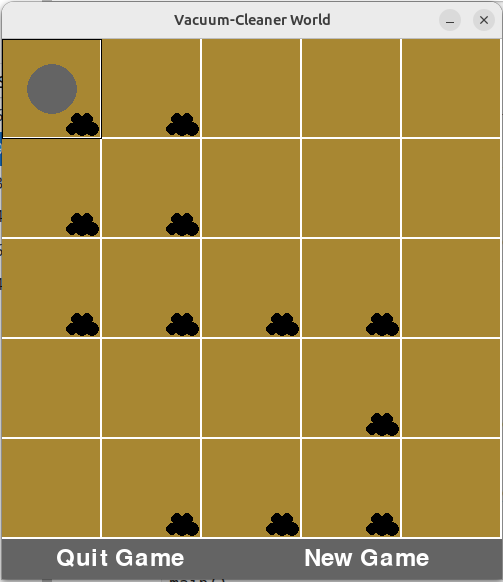

## Code and Tasks

Next, we have the code for the game implementation and in it, the tasks that you need to complete as part of your first programming exercise. Some of the tasks are exploratory, others are more programming-heavy, covering the topics we have introduced in class so far. The goals of this programming exercise are:

1. Get familiar with the basics of pygame
2. Build a basic AI-agent to find a solution for the game
3. Gain some programming experience

### Installation of pygame

We assume you all have a working python installation on your system (please make sure you do and that you have python version 3.x). You should also install pygame. That is very easy, and can be done by simply executing: 
`pip install pygame`. 

If pip does not work for you, then please just try the method you normally use to install python packages. 

We recommend you have a python version 3.10 and above and a pygame version 2.5.2 and above. All the code and examples given for this course are written and tested with Python 3.12.3 and pygame 2.6.1.

In [1]:
# In this cell, we import all the libraries we are going to use for this notebook
# I recommend you adopt this good-programming practice where all necessary
# libraries for your script are imported and found at the top of the script.
# Make sure you can run this cell with no issues.
# That means, your system should have and support all the necessary libraries.

import pygame
from pygame.locals import *
import sys
import numpy as np
from numpy import random
import random

pygame 2.6.1 (SDL 2.28.4, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Trong Khoi Van\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


### Basic game-related functions

We will start by implementing some basic logic and features for our game through dedicated functions. This is a good-programming practice, keeps your code organized, reduces redundant and repeated code, makes your code easier to follow,de-bug, update. I recommend it!

First, let us all get on the same page of the game implementation at a high level.

We wish to open the game, and every time we open the game, we have dirt placed on randomly chosen cells. The robot start always from the same cell, in each new game. Then, we can click move our robot, until we have cleaned all the dirty cells, at which point a small "Fantastic" message appears on the screen.

At all times, the player can quit the game (by clicking on a respective button) or start a new game (again, by clicking the respective button). To start a new game, means, we start our robot from its starting position and draw a new random placement of dirt on the cells.

#### Function : make_game_basics

This function receives two arguments: *res* and *game_title*, for the resolution (size) of the game window and the title of the game window. The function uses pygame methods to draw a screen (the surface we work on) with the set resolution, display the title of the window. In that function, we also create a dictionary for colors that we want to use, and we can get two variables from the game window, its width and height (these are in fact the two resolution parameters).

>**Task 1:**
>
> Read through the `make_game_basics` function, understand what is going on and add as many colours (a name and its RGB values) in the color dictionary as you wish. 

In [ ]:
def make_game_basics(res, game_title):
    #Testing: this is a change
    res = res 
    screen = pygame.display.set_mode(res) 
    
    pygame.display.set_caption(game_title)

    colors = {"white" :(255,255,255), "black" : (0,0,0), 
              "gray" :(100,100,100), "yellow" : (168, 135, 50)}
    
    width = screen.get_width() 
    height = screen.get_height() 

    return res, screen, colors, width, height

#### Make buttons with text

Next, we need a way to create buttons that have some text on them and that can be clicked, causing some functionality. To do that with pygame, we actually create shapes (rectangles in fact) and superpose text on them. Later on it is when functionality can be added for what happens when the button is clicked. So now, we are going together to finish up two functions `make_text` and `make_rect_with_text`. 

The `make_text` function will create some text objects, using a custom font and color. For this, we will use the following pygame object syntax:
`some_text = some_font.render(the_text, True, some_color)`
where some_font, the_text and some_color should be parameters. Each object needs to be assigned to a variable, that is the some_text. In the function, we will also get the size of the text we create (as that is often useful to have) by using the syntax: `some_text.get_size()`. This is also recommended to be assigned to a variable. The function should return some_text and the text's size.

The `make_rect_with_text` function, will draw a rectangle of custom color and size on a surface (on our window), and some text will be "placed" on it. To draw a rectangle we use pygame's:
`pygame.draw.rect(surface, color, [dimension information])`. The dimension information is the starting coordinates of the rectangle (x,y), its width and its height. To put text on the rectangle, we actually just try to write text on top of where the rectangle is to be on the surface. We use: `surface.blit(some_text, (text_coordinate_0, text_coordinate_1))`

Another way to think of the implementation of the button, is to also get a rectange for the text (that woud be in the `make_text` function) by using `some_text.get_rect()`, and use what this returns as the text_coordinates. One has to try out a few things to make the button working.

> **Task 2 (10/100 Points):**
>
> Finish the functions make_text (5 Points) and make_rect_with_text (5 Points), as per the description above.
> 
> You will be able to test your functions soon, so, for this task to be "completed" you will need to go back and forth working on this and the upcoming tasks for a bit...
>
> Grading: points are awarded for functions that implement the requested functionality and which use the described methods and logic.

In [ ]:
def make_text(myfont, text, color):

    # Finish the function

def make_rect_with_text(surface, color, c1, c2, w, h, text, text_c1, text_c2):

    # Finish the function


#### Functions for setting up the cells

Next, we create a bunch of functions (4 in our implementation) that together work to draw the grid canvas and the various objects (the robot and the dirt).

Function `gridCoords` is a basic function that is going to be eventually used for splitting the game canvas into square cells. What the function does is to create the pairs of coordinates for the grid cells of the canvas. The function returns a list of coordinate-pairs, each pair being a list structure. This function is given to you. You need to read through it and familiarize yourself with its structure and logic.

Function `drawGrid` needs to draw the rectangles that correspond to the cells of our grid. For each pair of coordinates, we need to draw a rectangle, without any text on it. Can you finish the code for this function? 

Function `drawVacuum` is the one that will create the cell with the gray circle inside it, which would correspond to our robot Vacuum Cleaner. All you have to do here, is create the cell that would correspond to the robot's coordinates and then a circle inside it. Can you figure out how to draw a circle with pygame? We recommend that the Vacuum should always start on the top leftmost cell, but you can change that if you feel like it.

Last, function `makeDirt` is the one that constructs the dirt object, which we can later on choose to draw on sampled cells. For this, the idea is to create a bunch of little circle objects, giving the impression of a pile of dirt (you can see our implementation in the picture above). We give you one such little circle and you can finish up the function by adding more circle objects. For this function, you also need to decide the parameters of the function. 

> **Task 3 (15/100 Points):**
> 
> 1. Familiarize yourselves with the `gridCoords` function.
> 2. [5 Points] Finish the `drawGrid` function as per the instructions above.
> 3. [5 Points] Finish the `drawVacuum` function as per the instructions above.
> 4. [5 Points] Finish the `makeDirt` function as per the instructions above.

In [ ]:
def gridCoords():

    cells_coords = []
    for i in [0, 100, 200, 300, 400]:
        for j in [0, 100, 200, 300, 400]:
            
            cells_coords.append([j,i])

    return(cells_coords)


def drawGrid(surface, color, cell_coords, text):

    for item in cell_coords:

        # Finish the function


def drawVacuum(surface, color, coords, cellSize):
    # draw a vacuum in the top-leftmost cell

    # Finish the function
    
def makeDirt():
    #make dirt objects

    pygame.draw.circle(surface,color,[coords[0]+85+0.8, coords[1]+80+0.8], 6)
    
    # Finish the function - Remember that you need to fill in the parameters as well!


#### Moving Legally Functions

Next, we need some code that will check that we are trying to move our vacuum the legal way (that is, to the four directions of the horizon and not diagonally). To implement this, you need to finish up two functions.  

Function `legalMove` needs to check, if we click within the grid of the canvas, and if so, if we click within the neighbourhood of the current position of the vacuum (that is, are we trying to fly away or are we moving diagonally?) and if so, we can update the coordinates of the vacuum to be the ones of the cell we have clicked. 

Function `get_valid_neighbours` returns the valid neighbours of the current cell. Valid neighbours of a cell, are the cells in the four directions (up, down, right, left).

> **Task 4 (10/100 Points) :**
>
> 1. [5 Points] Finish function legalMove as per the instructions above
> 2. [5 Points] Finish function get_valid_neighbours as per the instructions above.

In [ ]:
def legalMove(vacuum, clicked, rect_coords, width, height, cellSize):

    ''' Are we trying to move the vacuum within the legal limits?
    vacuum : current position of our vacuum : coordinates of the corresponding cell
    clicked : coordinates of the cell we have clicked
    rect_coords : the coordinates of the cells in the grid
    width : the width of the game window
    height : the height of the game window
    cellSize : the size of each cell

    Function should return updated new_vacuum_x, new_vacuum_y coordinates, if the vacuum can move. 
    If not, then the vacuum should stay where it is (same coordinates)
    '''
    new_vacuum_x, new_vacuum_y = vacuum
    
    x,y = clicked
    
    # if the click is within the legal play area
    if 0 < x < width and 0 < y < height-40:
        
        #find the (x,y) of the cell that is clicked:
        
        ### Finish the code
        
        # check if the cell is in the neighbourhood of the vacuum
        
        ### Finish the code
            
    return [new_vacuum_x, new_vacuum_y]

def get_valid_neighbours(vacuum_cell, all_cells, cellSize):
    ''' Who are my legal neighbours to which I can move to?
    current_cell : the current cell of the vacuum : its coordinates
    all_cells : coordinates of all the cells in the grid
    cellSize : the size of each cell
    
    Function should return a list that contains the coordinates of the legal neighbours
    '''
    
    x,y = vacuum_cell
    neighbours = []
    
    ## Finish the function

    return neighbours

### Dealing with all the Dirt Functions

Finally, we need some code that will help our vacuum identify if it is in a cell that has dirt, or not and if so, to clean it up and said dirt disappear from our canvas. To implement this, we are going to assume that we maintain two structures (lists perhaps?): one for all the cells that have dirt and one for all the cells that have been cleaned. Let's call the first one `dirt_cells` and the second one `cleaned_cells`. Then, you can finish off the next two functions:

Function `check_for_dirt` checks, every time the vacuum is in a cell, if the cell has dirt and it hasn't been cleaned. The function should return a flag which needs to be True if the vacuum is in a cell with dirt that hasn't been cleaned and False otherwise (that is, if the vacuum is in a cell that doesn't have dirt, or it is in a cell that has dirt but it has been cleaned already).

Function `clean_up_dirt` needs to check if the vacuum is in a cell with dirt that has not been cleaned and if so, update the corresponding structures related to the cleaning of the cells and update the corresponding cell's rectangle by removing the dirt objects (or drawing a new clean cell...). The function should return the updated cleaned_cells structure.

> **Task 5 (5/100 Points)**:
>
> 1. [2.5 Points] Finish function `check_for_dirt` as per the instructions above.
> 2. [2.5 Points] Finish function `clean_up_dirt` as per the instructions above.

In [ ]:
def check_for_dirt(vacuum_cell, dirt_cells, cleaned_cells):

    ### Finish the function

    return dirt_flag

def clean_up_dirt(vacuum_cell, dirt_cells, cleaned_cells, cellSize, surface):
    
    ### Finish the function
        
    return(cleaned_cells)

### Main Code

Below is the main code that we run the game from. Why didn't we start by introducing this one? Because functions need to be defined and compiled before they are used! So, after you have explored, finished and understood the code below, you can safely go back and adjust, update and finalize the functions we introduced above, as necessary.

The main code contains parts that are standard in a pygame implementation. We start by creating the game screen, the game basics (through the `make_game_basics` function). We define our own fonts, create texts that we are going to use in the game (through the `make_text` function), create necessary data structures for initializing and registering the cells of the grid and then we define the dimensions of the two rectangles we will create as buttons in the game.

Next comes the main function. The `main` function contais all the functionality that we need every time we ask for a new game to start (when we press the new game button, that is). So, it is easier to achieve that, by gathering all that functionality in a function to call to start the game, but also upon clicking the new game button.

In a pygame game, the game runs in a while loop. While the game runs, the objects are drawn on the screen and it is checked what events happen: is the mouse clicked? where it is clicked? what does need to happen then? is the quit game clicked? And so on and so forth.

> **Task 5 (30/100 Points):**
>
> Get familiar with the code below and finish the necessary tasks as found inside the code

In [ ]:
pygame.init()
pygame.font.init()
clock = pygame.time.Clock()

# Task 5.1 [2 Point]: define the resolution of the game and its title, as well the available colors for the game and the width and height
# of the game window, by calling appropriately the make_game_basics function
# The game has been designed for resolution (500, 540)
res, screen, colors, width, height = 

# Task 5.2 [4 Points]: We have defined a smallfont using the pygame.font.SysFont() syntax below. 
# Define a smaller and a bigger font (tinyfont, bigfont)
# Feel free to add more fonts in your game

smallfont = pygame.font.SysFont('Corbel',35)

# Task 5.3 [4 Points]: We need to create 4 text objects in our game. 
# One for the Quite Game button, one for the New Game button, one that
# prints a congratulatory message whenever a player solves the puzzle and a last one
# that will act as placeholder, without any text in it, for use when drawing the cells
# (Notice that all depending on your implementation, you might not need to use this last
# placeholder text object in your game. Nevertheless, YOU HAVE to create the requested text object
# here, without any text in it)
# Using the make_text function, create these four objects.


# Here we decide where do we want our quit game and new game buttons to be and how large we want them to be
# The numbers given are for the tested implementation, the one in the attached picture. 

quit_button_coords = [0, 500, 250, 40]
new_game_button_coords = [250, 500, 250, 40]

# Initializing the size of each grid cell
cellSize = 100

# As the cells' coordinates are fixed, we can produce them outside the main function
cells = gridCoords()

def main():

    # Task 5.4 [2 Points]: We need to now sample the cells that will be the dirty ones. Do that using sample
    # from random. You need to also initialize the vacuum cell, that is, where does the vacuum start
    # with every new game? That should be in a list structure. 

    # Here, we also initialize other variables that will be useful later in our game, namely, 
    # the dirt_flag variable that you will use when checking if a cell has dirt, a structure for 
    # maintaining any dirty cells that have been cleaned and a variable for keeping some click_time
    # (the use of which we will explain later)
    
    dirt_cells = 
    vacuum_cell = 
    dirt_flag = False
    
    cleaned_cells = []
    click_time = 0
    
    while True:

        # Inside this while loop is all that happens that we see on the screen : the window, the objects etc. This runs constantly, 
        # many times a minute, and by using the Clock, we can reduce that frequency, saving up CPU usage.
        
        # We create a screen with just white color : this is our canvas 
        # feel free to change the background color
        screen.fill(colors["white"]) 
        
        # We define as mouse to be where the position of the mouse is at all times (when clicked) 
        mouse = pygame.mouse.get_pos()

        # Task 5.5 [2 Points]: Use the draw_cells function to draw the grid cells of the game. 
        # All depending on your implementation, you might need to use those placeholder text objects here
        
        
        
        # Here we use the make_rect_with_text function to create the quit game button
        make_rect_with_text(screen, colors["gray"], quit_button_coords[0], 
                        quit_button_coords[1], quit_button_coords[2], 
                        quit_button_coords[3], 
                        quit_game, quit_button_coords[0]+(quit_game_size[0]/2)-10, 
                       quit_button_coords[1] + (quit_game_size[1]/2)-5)
    
        # Task 5.6 [3 Points]: Following the example above, use the make_rect_with_text function
        # to create the new game button
        



        # Task 5.7:Next, you need to draw the vacuum and the dirt. First, use the drawVacuum
        # Function to draw the vacuum in the right cell [2 Points]. Then, use the makeDirt function
        # to draw the cell to any cells that have been sampled as dirty ones earlier [2 Points]. As this main 
        # part of the code will be refreshed by pygame all the time, maintaining a smooth and continuous 
        # image of the game, I recommend you to implement this part here so that the dirt is drawn in 
        # cells that have been sampled as dirty AND which have not been cleaned yet. 
        # Hint: use of a for loop and an if condition...

        # Draw the vacuum

        # Draw the dirt
       
        

        # The next for loop is found in the pygame scripts, it checks for events that happen and what actions need to happen in case
        # an event occurs
        for ev in pygame.event.get():
            
            if ev.type == pygame.QUIT: 
                pygame.quit() 
                sys.exit()

               
            #checks if a mouse is clicked 
            if ev.type == pygame.MOUSEBUTTONDOWN: 

                if quit_button_coords[0] <= mouse[0] <= quit_button_coords[0]+250 and quit_button_coords[1] <= mouse[1] <= quit_button_coords[1]+40: 
                    pygame.quit() 
                    sys.exit()
    
                if new_game_button_coords[0] <= mouse[0] <= new_game_button_coords[0]+250 and new_game_button_coords[1] <= mouse[1] <= new_game_button_coords[1]+40:
                    main()

                # if the mouse clicks on a cell, then we need to see, is it a legal cell? 
                # and therefore move the vacuum there
                
                # Task 5.8:Using the legalMove function, get the next position of the vacuum (assuming the click is legal)[3 Points]
                # Then, using the check_for_dirt function, check if the landed cell is dirty and therefore
                # the corresponding flag needs to be updated[3 Points]. Since we want to also later on implement
                # the functionality that with a double click the dirt is to get cleaned, we need to here
                # force our code to just check for dirt and not clean it as soon as we move the vacuum 
                # to a new dirty cell. For this reason, the check_for_dirt execution needs to happen within
                # a time check - this we have done for you.

                # Use the legalMove function
                vacuum_cell = 

                
                if time.time() - click_time < 0.2:
                    dirt_flag = # Use the check_for_dirt function
                click_time = time.time()
                
        # Next we need to perform two checks: If the landed cell is dirty we need to clean it and
        # If we have cleaned all the dirty cells we need to end the game and congratulate the player

        # Task 5.9 [3 Points]: Use the clean_up_dirt function to update the cleaned_cells structure. Under what
        # condition of the dirt_flag should that happen? Remember to update the flag afterwards!
    
        
        if len(cleaned_cells) == len(dirt_cells):
            make_rect_with_text(screen, colors["gray"], 150-win_game_size[0]/2, 120-win_game_size[1]/2, win_game_size[0], win_game_size[1]+60, 
                        win_game, 150-(win_game_size[0]/2), 
                       120 + (win_game_size[1]/2))

        # There always need to be a display update, so that, while the game runs, the objects that we wish appear on our screen
        pygame.display.update()
        clock.tick(60)

# Run the game by calling the main function
main()

## Building an AI to find the solution to the game

Now we need to make an agent that can play the game for us. We will make an easy one, to begin with. 

To do that, we need to implement a search algorithm (Breadth First Search or Depth First Search) to help our AI explore the search space, explore the available moves and from that, find a path (sequence of moves) that will lead to cleaning the whole board from all dirt. 

> **Task 7 (30/100 Points):**
> 
> Write a function def bfs(), that implements the corresponding search algorithm for the Vacuum-Cleaner World.
>
> The function has to, given the placement (that is, the coordinates) of the robot, the cells of the grid and the ones that are dirty, to explore the legal moves and find a path (sequence of cells) to clean all the dirty cells from dirt [Notice, we are not looking for the most optimal path to clean all the dirty cells, just a path]. The function should return a structure that contains the order in which the legal cells were visited by the algorithm. You need to *insert* the code at the appropriate place inside the main function of the game, so that, once a new game starts, bfs() runs and prints the order in which the legal cells would be visited by the BFS algorithm.
>
> Your code has to be able to work alongside the code for the game, so that we could use it. When it comes to the logic of the function, we remind you that in the notebook `uninformed_search_exercises` you worked on the BFS algorithm on a toy example. We recommend you use that code as inspiration and as a starting point for your code in Task 7, as by doing that, your task will be very straightforward!
>
> For this game, you need to consider that for the BFS's sake, the "legal moves" are not just moving up, down, right and left, but also, suck dirt! Remember when in the first lessons we talked and worked extensively about defining a problem as a search game and figuring out the legal moves!
>
> We provide you a function called get_next_states, which is going to be used inside your BFS function. Familiarize yourselves with the function and make sure you understand what it does. Then, for your BFS, we provide some extra help by sketching out the logic that you need to implement **additionally to the logic of the algorithm**.
>
> Helping sketch:
> After you take the next state to expand, after you have checked if that state has been visited already, you need to update the next_states and dirt_cells,as those are produced through the given get_next_states function. The idea here is that, if the next state to expand is in the produced next_states, then you need to add the state "sucked dirt" in your visited structure... Also, consider, what is the goal state here? Is it to reach a particular cell or a particular state? What is that state? How can you check if that state has been reached in your BFS function, so that the while loop stops and the algorithm stops and then returns the visited structure?
>
> Grading: 15/30 Points are awarded for the logic of the BFS function's implementation. Does it use the right data structure? Does it do what it is meant to do? The rest of the points are awarded for using the function in the game. That is, have you placed it at the right location in the main so that the algorithm is run at each new game? Does the function return the right result (in the right structure, in the rigth format and with the right content)?

In [ ]:
def get_next_states(vacuum_cell, all_cells, dirt_cells, cellSize):
    ### Legal moves are : go left, go right, go up, go down, suck dirt

    next_states = []
    if vacuum_cell in dirt_cells:
        next_states.append(vacuum_cell)
        dirt_cells.remove(vacuum_cell)
        
    neighbours = get_valid_neighbours(vacuum_cell, all_cells, cellSize)
    for item in neighbours:
        next_states.append(item)
    
    return(next_states, dirt_cells)


def bfs():

    # Write the function

    return visited
       